### Non-hierarchical clustering (kmeans): WholeSale data  

#### Import libraries  

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#### Parameters  

In [5]:
csv_in = '../ai-0102/pandas_training-utf8.csv'

# To show more rows and columns
pd.options.display.max_rows = 999 
pd.options.display.max_columns = 999 

#### Read CSV file  

In [6]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=13, header=0)
print(df.shape)
print(df.info())
display(df.head())
display(df.describe())

(440, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CHANNEL    440 non-null    object
 1   REGION     440 non-null    object
 2   FRESH      440 non-null    int64 
 3   MILK       440 non-null    int64 
 4   GROCERY    440 non-null    int64 
 5   FROZEN     440 non-null    int64 
 6   DET_PAPER  440 non-null    int64 
 7   DELICA     440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 27.6+ KB
None


,CHANNEL,REGION,FRESH,MILK,GROCERY,FROZEN,DET_PAPER,DELICA
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Horeca,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


,FRESH,MILK,GROCERY,FROZEN,DET_PAPER,DELICA
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


#### Separate data  

In [7]:
df_data = df.loc[:, 'FRESH':]
print(df_data.shape)
display(df_data.head())

(440, 6)


,FRESH,MILK,GROCERY,FROZEN,DET_PAPER,DELICA
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


#### Standardization  

In [16]:
sc = StandardScaler()
X_std = sc.fit_transform(df_data)
print(X_std.shape)
display(X_std)

(440, 7)


array([[ 0.05293319,  0.52356777, -0.04111489, ..., -0.04356873,
        -0.06633906, -0.27090386],
       [-0.39130197,  0.54445767,  0.17031835, ...,  0.08640684,
         0.08915105, -0.27090386],
       [-0.44702926,  0.40853771, -0.0281571 , ...,  0.13323164,
         2.24329255, -0.27090386],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, ...,  2.51121768,
         0.12145607,  2.86587765],
       [-0.13538389, -0.51753572, -0.60251388, ..., -0.56977032,
         0.21304614, -0.27090386],
       [-0.72930698, -0.5559243 , -0.57322717, ..., -0.50488752,
        -0.52286938, -0.27090386]])

#### Elbow method  

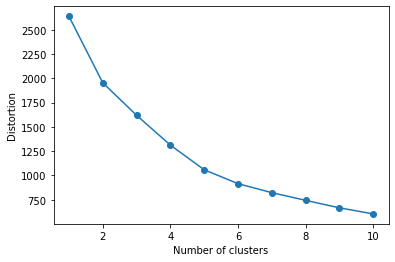

In [9]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X_std)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

#### Execute clustering  

In [10]:
n_cls = 3
km = KMeans(n_clusters=n_cls, random_state=7)
cls = km.fit_predict(X_std)

#### Add results of clustering into df_data  

In [11]:
df_data['kmeans'] = cls

#### Check number of members of each cluster  

In [12]:
print(df_data['kmeans'].value_counts())

1    392
2     43
0      5
Name: kmeans, dtype: int64


#### Calculate average of each category  

In [13]:
df_ave = df_data.groupby('kmeans').mean()
display(df_ave)

,FRESH,MILK,GROCERY,FROZEN,DET_PAPER,DELICA
kmeans,,,,,,
0,50270.600000,26361.800000,16416.000000,25122.800000,2475.000000,18595.200000
1,11983.316327,4112.778061,5528.380102,2932.076531,1696.469388,1265.818878
2,7705.069767,18752.069767,29054.813953,1782.837209,13731.767442,1901.534884


#### Draw stacked bar plot  

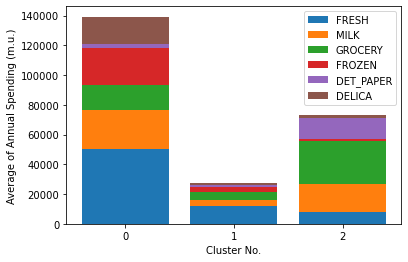

In [14]:
height = np.zeros(n_cls)
xx = list(df_ave.index)
plt.xticks(xx, df_ave.index)
for i in range(df_ave.shape[1]):
    c = df_ave.iloc[:, i]  # column i
    plt.bar(xx, c, bottom=height, label=c.name)
    height+=c
plt.xlabel('Cluster No.')
plt.ylabel('Average of Annual Spending (m.u.)')
plt.legend()
plt.show()